In [1]:
#The csv files (USvideos.csv, MXvideos.csv) are available @https://www.kaggle.com/datasnaek/youtube-new
#The dfs are created below from two files. 
#Steps to clean data are:
#1.Removing unnecessary columns
#2.Adding “category_name” column
#3.Dropping rows with NaN values
#4.Outliers


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
usa_df=pd.read_csv("USvideos.csv", parse_dates=[5])
mx_df=pd.read_csv("MXvideos.csv",engine='python')


In [3]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [4]:
mx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40451 non-null  object
 1   trending_date           40451 non-null  object
 2   title                   40451 non-null  object
 3   channel_title           40451 non-null  object
 4   category_id             40451 non-null  int64 
 5   publish_time            40451 non-null  object
 6   tags                    40451 non-null  object
 7   views                   40451 non-null  int64 
 8   likes                   40451 non-null  int64 
 9   dislikes                40451 non-null  int64 
 10  comment_count           40451 non-null  int64 
 11  thumbnail_link          40451 non-null  object
 12  comments_disabled       40451 non-null  bool  
 13  ratings_disabled        40451 non-null  bool  
 14  video_error_or_removed  40451 non-null  bool  
 15  de

In [5]:
#usa_df['category_id'].unique()

In [6]:
#The following code did run and then I saved the final dictionaries in category_mx and category_usa. The API key cannot be
#shared as I did before and seems like someone took it and running it crazily everyday making my daily quota exceed 10K hits. 


#import requests
#temp_category_usa={}
#temp_category_mx={}

#API_key=

#url="https://www.googleapis.com/youtube/v3/videoCategories?part=snippet&regionCode=US&key=API_key"
#res=requests.get(url)
#cat_json_usa=res.json()

#url1="https://www.googleapis.com/youtube/v3/videoCategories?part=snippet&regionCode=MX&key=API_key"
#res1=requests.get(url1)
#cat_json_mx=res1.json()



#for i in range(len(cat_json_usa['items'])):
#    temp_category_usa[cat_json_usa['items'][i]['id']]=cat_json_usa['items'][i]['snippet']['title']
#temp_category_usa


#for i in range(len(cat_json_mx['items'])):
#    temp_category_mx[cat_json_mx['items'][i]['id']]=cat_json_mx['items'][i]['snippet']['title']
#temp_category_mx

#The temp_category_usa and temp_category_mx produce a dictionary with keys as strings and I need to redo that to have an integer value i.e.
#without ' ' around the number. If it is left with '' then map command cannot match the integer value in usa_df_dropcol to string val in temp_category_mx
#category_usa= {int(old_key): val for old_key, val in temp_category_usa.items()}
#category_mx= {int(old_key): val for old_key, val in temp_category_mx.items()}

#category_usa

In [7]:
category_mx={1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}
category_usa={1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [8]:
print(category_usa == category_mx)

False


In [9]:
usa_df_dropcol=usa_df.drop(['video_id','thumbnail_link','description','tags','channel_title'], axis=1)

In [10]:
mx_df_dropcol=mx_df.drop(['video_id','thumbnail_link','description','tags','channel_title'], axis=1)

In [11]:
usa_df_dropcol.head(10)

,trending_date,title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False
3,17.14.11,Nickelback Lyrics: Real or Fake?,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False
4,17.14.11,I Dare You: GOING BALD!?,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False
5,17.14.11,2 Weeks with iPhone X,28,2017-11-13 19:07:23+00:00,119180,9763,511,1434,False,False,False
6,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,24,2017-11-12 05:37:17+00:00,2103417,15993,2445,1970,False,False,False
7,17.14.11,5 Ice Cream Gadgets put to the Test,28,2017-11-12 21:50:37+00:00,817732,23663,778,3432,False,False,False
8,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,1,2017-11-13 14:00:23+00:00,826059,3543,119,340,False,False,False
9,17.14.11,Why the rise of the robots won’t mean the end ...,25,2017-11-13 13:45:16+00:00,256426,12654,1363,2368,False,False,False


In [12]:
usa_df_dropcol['category_name']=usa_df_dropcol['category_id'].map(category_usa)

In [13]:
mx_df_dropcol['category_name']=mx_df_dropcol['category_id'].map(category_mx)

In [14]:
####For use later
###usa_df_dropcol[(usa_df_dropcol['likes']== 0) & (usa_df_dropcol['ratings_disabled'] == False)]

In [15]:
usa_df_dropcol.info()
#From the info one can see that there are no null values in any of the cols for usa_df_dropcol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   trending_date           40949 non-null  object             
 1   title                   40949 non-null  object             
 2   category_id             40949 non-null  int64              
 3   publish_time            40949 non-null  datetime64[ns, UTC]
 4   views                   40949 non-null  int64              
 5   likes                   40949 non-null  int64              
 6   dislikes                40949 non-null  int64              
 7   comment_count           40949 non-null  int64              
 8   comments_disabled       40949 non-null  bool               
 9   ratings_disabled        40949 non-null  bool               
 10  video_error_or_removed  40949 non-null  bool               
 11  category_name           40949 non-null  o

In [16]:
mx_df_dropcol.info()
#From the info one can see that there are no null values in any of the cols for mx_df_dropcol except the new added col, 'category_name'
#Investingating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40451 non-null  object
 1   title                   40451 non-null  object
 2   category_id             40451 non-null  int64 
 3   publish_time            40451 non-null  object
 4   views                   40451 non-null  int64 
 5   likes                   40451 non-null  int64 
 6   dislikes                40451 non-null  int64 
 7   comment_count           40451 non-null  int64 
 8   comments_disabled       40451 non-null  bool  
 9   ratings_disabled        40451 non-null  bool  
 10  video_error_or_removed  40451 non-null  bool  
 11  category_name           40199 non-null  object
dtypes: bool(3), int64(5), object(4)
memory usage: 2.9+ MB


In [17]:
temp_rows_drop=mx_df_dropcol
temp_rows_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40451 non-null  object
 1   title                   40451 non-null  object
 2   category_id             40451 non-null  int64 
 3   publish_time            40451 non-null  object
 4   views                   40451 non-null  int64 
 5   likes                   40451 non-null  int64 
 6   dislikes                40451 non-null  int64 
 7   comment_count           40451 non-null  int64 
 8   comments_disabled       40451 non-null  bool  
 9   ratings_disabled        40451 non-null  bool  
 10  video_error_or_removed  40451 non-null  bool  
 11  category_name           40199 non-null  object
dtypes: bool(3), int64(5), object(4)
memory usage: 2.9+ MB


In [18]:
rowstodel=mx_df_dropcol[mx_df_dropcol['category_name'].isnull()].index
mx_df_dropcol.drop(rowstodel, inplace=True)
mx_df_dropcol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40199 entries, 0 to 40450
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40199 non-null  object
 1   title                   40199 non-null  object
 2   category_id             40199 non-null  int64 
 3   publish_time            40199 non-null  object
 4   views                   40199 non-null  int64 
 5   likes                   40199 non-null  int64 
 6   dislikes                40199 non-null  int64 
 7   comment_count           40199 non-null  int64 
 8   comments_disabled       40199 non-null  bool  
 9   ratings_disabled        40199 non-null  bool  
 10  video_error_or_removed  40199 non-null  bool  
 11  category_name           40199 non-null  object
dtypes: bool(3), int64(5), object(4)
memory usage: 3.2+ MB


In [19]:
usa_df_clean=usa_df_dropcol
mx_df_clean=mx_df_dropcol

In [20]:
pd.options.display.float_format = '{:,.1f}'.format
usa_df_clean[['views','likes','dislikes','comment_count']].describe()

,views,likes,dislikes,comment_count
count,"40,949.0","40,949.0","40,949.0","40,949.0"
mean,"2,360,784.6","74,266.7","3,711.4","8,446.8"
std,"7,394,113.8","228,885.3","29,029.7","37,430.5"
min,549.0,0.0,0.0,0.0
25%,"242,329.0","5,424.0",202.0,614.0
50%,"681,861.0","18,091.0",631.0,"1,856.0"
75%,"1,823,157.0","55,417.0","1,938.0","5,755.0"
max,"225,211,923.0","5,613,827.0","1,674,420.0","1,361,580.0"


In [21]:
mx_df_clean[['views','likes','dislikes','comment_count']].describe()

,views,likes,dislikes,comment_count
count,"40,199.0","40,199.0","40,199.0","40,199.0"
mean,"343,243.9","15,888.9",739.3,"2,028.5"
std,"1,717,762.3","80,733.3","10,836.1","13,580.6"
min,157.0,0.0,0.0,0.0
25%,"16,853.0",303.0,17.0,42.0
50%,"57,057.0","1,264.0",63.0,197.0
75%,"207,418.5","7,318.5",269.0,894.0
max,"100,912,384.0","4,470,923.0","1,353,667.0","905,925.0"


In [22]:
#Searching Outliers

In [23]:
#sns.boxplot(x=usa_df_clean['views'],showfliers = False)

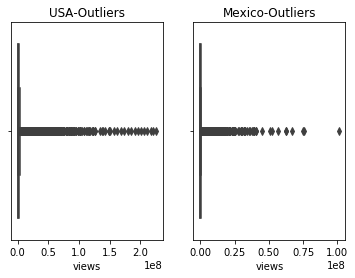

In [24]:
plt.subplot(1,2,1)
plt.title('USA-Outliers')
sns.boxplot(x=usa_df_clean['views'])

plt.subplot(1,2,2)
plt.title('Mexico-Outliers')
sns.boxplot(x=mx_df_clean['views'])

In [25]:
#import numpy as np
#size=40949
#y=usa_df_clean['views']
#removed_outliers=y.between(y.quantile(.05),y.quantile(.95))
#print(str(y[removed_outliers].size) + "/" + str(len(usa_df_clean)) + " data points remain.")
#y[removed_outliers].plot.get_figure()

#sns.boxplot(x=y[removed_outliers])

In [26]:
temp_mx=mx_df_clean #saving the cleaned seperate US df in another temp_mx

In [27]:
temp_usa=usa_df_clean #saving the cleaned seperate MX df in another temp_mx

In [28]:
#Combining the two country's data together. Added another column 'country' to both cleaned dataframes and them appended MX under USA df. 

In [29]:
mx_df_clean['country']='Mexico'

In [30]:
usa_df_clean['country']='USA'

In [31]:
combined_usa_mx_df=usa_df_clean.append(mx_df_clean)

In [32]:
combined_usa_mx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81148 entries, 0 to 40450
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           81148 non-null  object
 1   title                   81148 non-null  object
 2   category_id             81148 non-null  int64 
 3   publish_time            81148 non-null  object
 4   views                   81148 non-null  int64 
 5   likes                   81148 non-null  int64 
 6   dislikes                81148 non-null  int64 
 7   comment_count           81148 non-null  int64 
 8   comments_disabled       81148 non-null  bool  
 9   ratings_disabled        81148 non-null  bool  
 10  video_error_or_removed  81148 non-null  bool  
 11  category_name           81148 non-null  object
 12  country                 81148 non-null  object
dtypes: bool(3), int64(5), object(5)
memory usage: 7.0+ MB


In [33]:
#RESETTING INDEX AS APPENDING MX DF TO USA DF made the index out of order
combined_usa_mx_df.reset_index(inplace = True, drop = True) 

#DROPPING DUPLICATES
combined_usa_mx_df.drop_duplicates(inplace=True)

#RESETTING INDEX one more time as dropping dups made the index out of order again
combined_usa_mx_df.reset_index(inplace = True, drop = True)

#combined_usa_mx_df.info()
#remaining records=81051

In [34]:
# Making trend_date and publish time as datetime objects

#PUBLISH TIME:
combined_usa_mx_df['publish_time']=pd.to_datetime(combined_usa_mx_df['publish_time'],utc=True)
combined_usa_mx_df['publish_time'] = combined_usa_mx_df['publish_time'].apply(lambda x: x.date())
combined_usa_mx_df['publish_time']=pd.to_datetime(combined_usa_mx_df['publish_time'])


#TRENDING_DATE
#Since the trending_date is in non triditional format i.e stored as an object with format YY.DD.MM a function to reorder these 
#values is necessary. Tempdate func reorders the values to show YYMMDD

def tempdate(a):
    b=a.split(".")
    c=b[1]+b[2]+b[0]
    return c

combined_usa_mx_df['trending_date_new']=combined_usa_mx_df['trending_date'].apply(tempdate)
combined_usa_mx_df['trending_date_new']=pd.to_datetime(combined_usa_mx_df['trending_date_new'])
combined_usa_mx_df['trending_date']=combined_usa_mx_df['trending_date_new']
combined_usa_mx_df.drop(['trending_date_new'],axis=1,inplace=True)
combined_usa_mx_df['trending_date']=pd.to_datetime(combined_usa_mx_df['trending_date'])
#combined_usa_mx_df.info()
#Both dateTime columns have been converted to dateTime type successfully
###

In [35]:
combined_usa_mx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81051 entries, 0 to 81050
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           81051 non-null  datetime64[ns]
 1   title                   81051 non-null  object        
 2   category_id             81051 non-null  int64         
 3   publish_time            81051 non-null  datetime64[ns]
 4   views                   81051 non-null  int64         
 5   likes                   81051 non-null  int64         
 6   dislikes                81051 non-null  int64         
 7   comment_count           81051 non-null  int64         
 8   comments_disabled       81051 non-null  bool          
 9   ratings_disabled        81051 non-null  bool          
 10  video_error_or_removed  81051 non-null  bool          
 11  category_name           81051 non-null  object        
 12  country                 81051 non-null  object

In [36]:
#dropping all the rows where trending date is earlier than video's publishing date. Started with 81051 rows. Almost 10K rows will be dropped based on this criteria
#leaving 70795 rows

t=combined_usa_mx_df[(combined_usa_mx_df.trending_date) < (combined_usa_mx_df.publish_time)].index

combined_usa_mx_df.drop(t,inplace=True)
combined_usa_mx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70795 entries, 0 to 81050
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           70795 non-null  datetime64[ns]
 1   title                   70795 non-null  object        
 2   category_id             70795 non-null  int64         
 3   publish_time            70795 non-null  datetime64[ns]
 4   views                   70795 non-null  int64         
 5   likes                   70795 non-null  int64         
 6   dislikes                70795 non-null  int64         
 7   comment_count           70795 non-null  int64         
 8   comments_disabled       70795 non-null  bool          
 9   ratings_disabled        70795 non-null  bool          
 10  video_error_or_removed  70795 non-null  bool          
 11  category_name           70795 non-null  object        
 12  country                 70795 non-null  object